# Homework 8

## Instructions
+ Please write you solutions in cells below each problem. Use multiple cells if necessary. 
+ The solutions may be in the form of code, markdown, or a combination of both. Make an effort to present the solutions in a clean fashion.
+ Please submit this notebook in your git repository, under the folder `problemset`. The notebook should be titled `lastname_firstname_hw8.ipynb` (all lower case).


For all the plots below: please label each axes, add a legend (where appropriate), and title the plot. All the fontsizes should be at least $14$.


### Problem 1: Project (2 points)

Let me know in a cell below which project option you plan to choose. If you're proposing your own project, please give the appropriate details. 

##### I choose project 3 – Clustering

### Problem 2: 1D plotting (3 points)

Problem 1: The file [src/plot/xy.dat](https://github.com/hplgit/scipro-primer/blob/master/src/plot/xy.dat) contains two columns of numbers, corresponding to x and y coordinates on a curve.


Save the file in a local folder as `xy.dat`. You can read the data as 
```
import numpy as np
# Read table of floats
data = np.loadtxt(’xy.dat’, dtype=np.float) # Extract one-dim arrays from two-dim data 
x = data[:,0] # column with index 0
y = data[:,1] # column with index 1
```


1. Plot the data points as a black curve (with linewidth 3). 
2. Plot the global minimizer and maximizer as red points on the curve. Compute these points by searching through the y-coordinates (you do not need an optimization routine). 
3. Add a legend entry for the curve, the minimizer, and the maximizer.

Text(0.5, 1.0, 'plot')

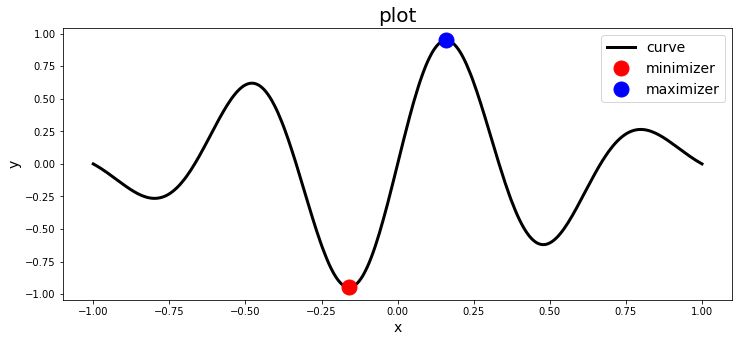

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 5]
data = np.loadtxt('xy.dat',dtype=np.float)
x = data[:,0]
y = data[:,1]
import matplotlib.pyplot as plt
plt.plot(x,y,'k-',lw=3)
x[y==max(y)]
xmax = 0.16
ymax = y.max()
x[y==min(y)]
xmin = -0.16
ymin = y.min()
plt.plot(xmin,ymin,'or',color='red',markersize=15)
plt.plot(xmax,ymax,'or',color='blue',markersize=15)
plt.legend(( 'curve','minimizer','maximizer' ), loc='upper right',fontsize=14)
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.title('plot', fontsize = 20 )

### Problem 3: 2D Plotting (5 points) 
Consider the Rosenbrock function 
$$ f(x_1,x_2) = (x_1-1)^2  + 100(x_2-x_1^2)^2.$$

1. Plot the function as three different subplots using `pcolormesh`, `contour` or `contourf`, `surf` (you need to use `mplot3d`).
2. Find the global minimum using `scipy.optimize.minimize`.
3. Plot the optimization path (i.e., the sequence of iterates) on a contour plot. Note that to get the optimization history use the `callback` option. Here is an example of a callback function; the list `hist` has the iteration history.  

```
hist = []
def callback(xk):
    hist.append(xk)
    return 
```

In [7]:
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 40)
X, Y = np.meshgrid(x, y)
z = (X-1)**2 + 100*(Y-X**2)**2

Text(0.5, 0.92, 'Surface plot')

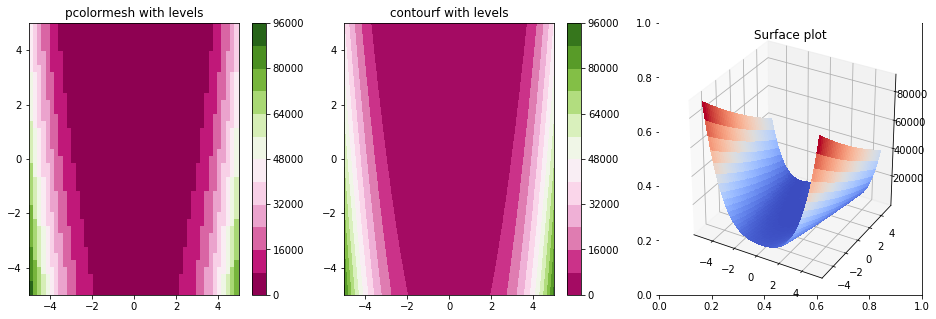

In [8]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = [16, 5]
fig, (ax0, ax1,ax2) = plt.subplots(ncols=3)
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')
cf = ax1.contourf(X,Y, z, levels=levels,cmap=cmap)
fig.colorbar(cf, ax=ax1)
ax1.set_title('contourf with levels')
ax2 = fig.add_subplot(1, 3, 3, projection='3d')
surf = ax2.plot_surface(X, Y, z,cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax2.set_title('Surface plot')

In [9]:
from scipy.optimize import minimize
from autograd import value_and_grad
def f(X,Y): 
    return (X-1)**2 + 100*(Y-X**2)**2
s1 = minimize(value_and_grad(lambda t: f(*t)), np.array([2., 3.]), method='Newton-CG',jac=True, tol=1e-18, callback=print)
dict(s1).values

[1.78774275 3.05293198]
[1.75079167 3.06310984]
[1.74963476 3.06327571]
[1.63942423 2.67744145]
[1.63601571 2.67831511]
[1.52028437 2.29943071]
[1.51627084 2.30058394]
[1.42410119 2.02088771]
[1.42139121 2.02167569]
[1.33437158 1.77409718]
[1.33183948 1.77489166]
[1.24474922 1.54268682]
[1.24208936 1.54361878]
[1.12261489 1.24648043]
[1.11731579 1.24875065]
[1.06254548 1.12620477]
[1.06135528 1.12671154]
[1.04615291 1.09438549]
[1.01027401 1.01935545]
[1.0097387 1.0196104]
[0.9999251  0.99975389]
[0.99988678 0.99977312]
[0.99999995 0.99999989]
[1. 1.]
[1. 1.]
[1. 1.]


<function dict.values>

In [14]:
t = np.array([2., 3.])
def m1(path=[]):
    def m2(tk):
        path.append(np.copy(tk))
    return m2
path0 = [t]
res = minimize(value_and_grad(lambda args: f(*args)), t, 
               method='Newton-CG',jac=True, tol=1e-20, callback=m1(path0))
path = np.array(path0).T
path.shape

(2, 27)

Text(0, 0.5, 'y')

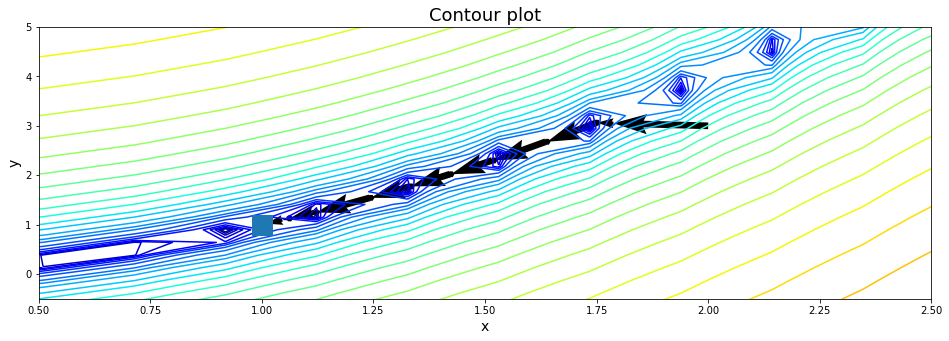

In [15]:
from matplotlib.colors import LogNorm
fig, ax = plt.subplots()
ax.contour(X, Y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1],
          scale_units='xy', angles='xy', scale=1, color='k')
min0 = np.array([1, 1])
min1 = min0.reshape(-1, 1)
ax.plot(*min0,'s',markersize=20)
ax.set_xlim((0.5, 2.5))
ax.set_ylim((-0.5, 5))
ax.set_title('Contour plot', fontsize = 18)
ax.set_xlabel('x', fontsize = 14)
ax.set_ylabel('y', fontsize = 14)